## Estimation of Income of People Greater than 50K
## BY - VAISHNAVI PATIL

 ## 1. Import the libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
import lightgbm
import catboost
import xgboost

* ## Read the Data

In [3]:
df=pd.read_csv('Census Income/adult.data.csv')

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

* ## Rename the Columns

In [6]:

df.columns=['Age','Workclass','FinalWeight','Education','YearsEducation','MaritalStatus',
             'Occupation','Relationship','Race','Gender','CaptialGain','CapitalLoss','HrsPerWeek','Country','Income']

In [7]:
df.head()

,Age,Workclass,FinalWeight,Education,YearsEducation,MaritalStatus,Occupation,Relationship,Race,Gender,CaptialGain,CapitalLoss,HrsPerWeek,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


* ## Check for Missing Values

<AxesSubplot:>

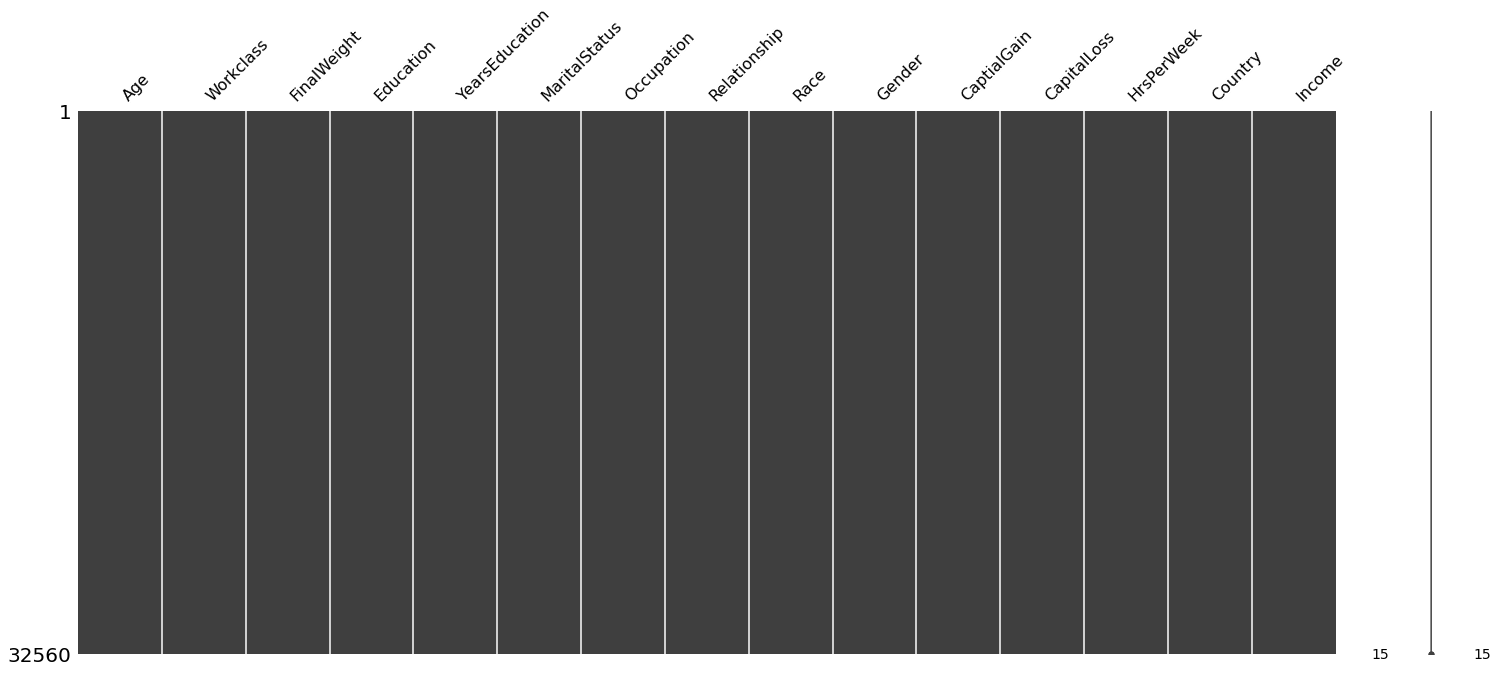

In [8]:
msno.matrix(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   FinalWeight     32560 non-null  int64 
 3   Education       32560 non-null  object
 4   YearsEducation  32560 non-null  int64 
 5   MaritalStatus   32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Gender          32560 non-null  object
 10  CaptialGain     32560 non-null  int64 
 11  CapitalLoss     32560 non-null  int64 
 12  HrsPerWeek      32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* ## Segregate into Object and Numerical Columns

In [10]:
num_cols=df.select_dtypes('int64')
object_cols=df.select_dtypes('object')

* ## Plotting Histograms of Numerical Columns

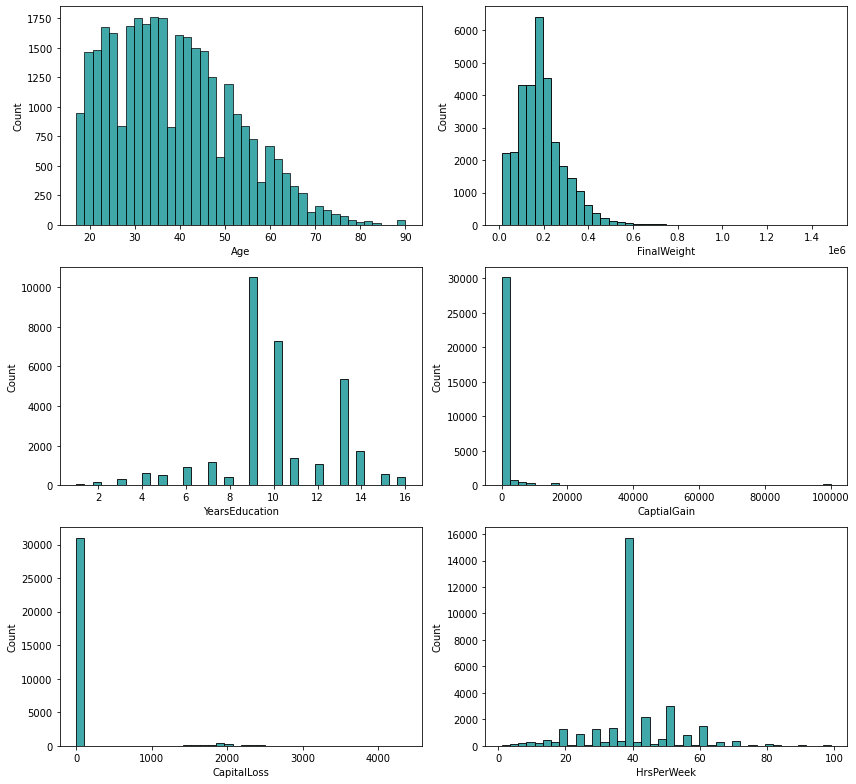

In [11]:
fig=plt.figure()
for i,col in enumerate(num_cols):
    fig.add_subplot(3,2,i+1)
    fig.set_size_inches(12,11)
    sns.histplot(x=col,data=df,bins=40,color='darkcyan')
    plt.tight_layout()

* ## Box Plot for all Numerical Columns
* ### We observe outliers in each of the numerical features.

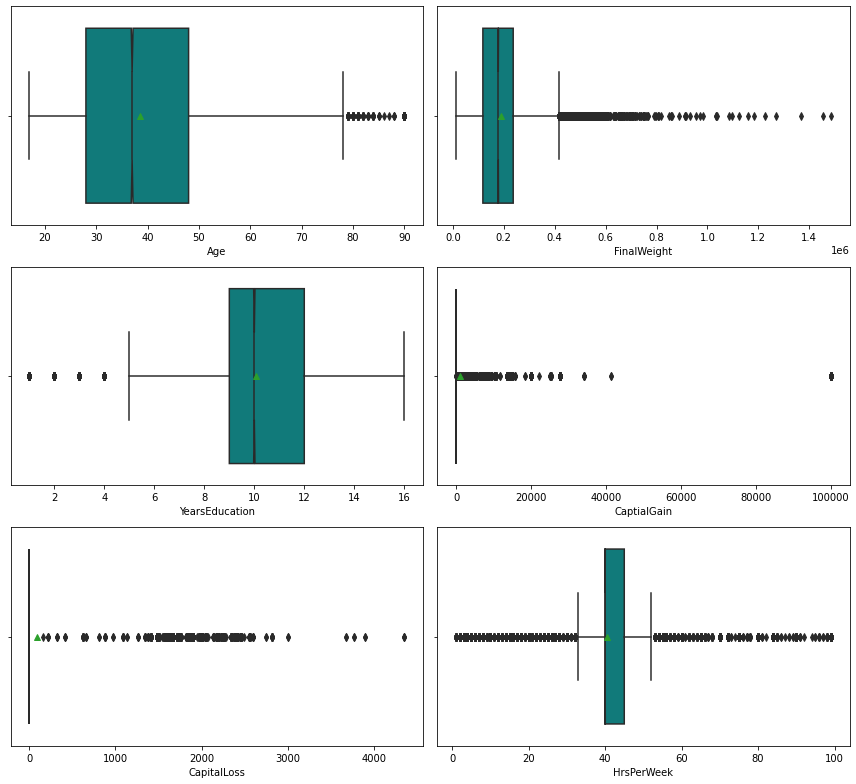

In [12]:
fig=plt.figure()
for i,col in enumerate(num_cols):
    fig.add_subplot(3,2,i+1)
    fig.set_size_inches(12,11)
    sns.boxplot(x=col,data=df,showmeans=True,
                showfliers=True,notch=True,color='darkcyan')
    plt.tight_layout()

## Detecting Outliers using Inter-Quartile Range.
## Replace the Outliers with the median of the respective feature columns.

In [13]:
for col in num_cols:
    q75,q25=np.percentile(df[col],[75,25])
    intrqr=q75-q25
    max=q75+(1.5*intrqr)
    min=q25-(1.5*intrqr)
    for val in df[col]:
        if val < min or val > max:
            df[col]=df[col].replace(val,df[col].median())

## Plot the Box plots again after removing outliers

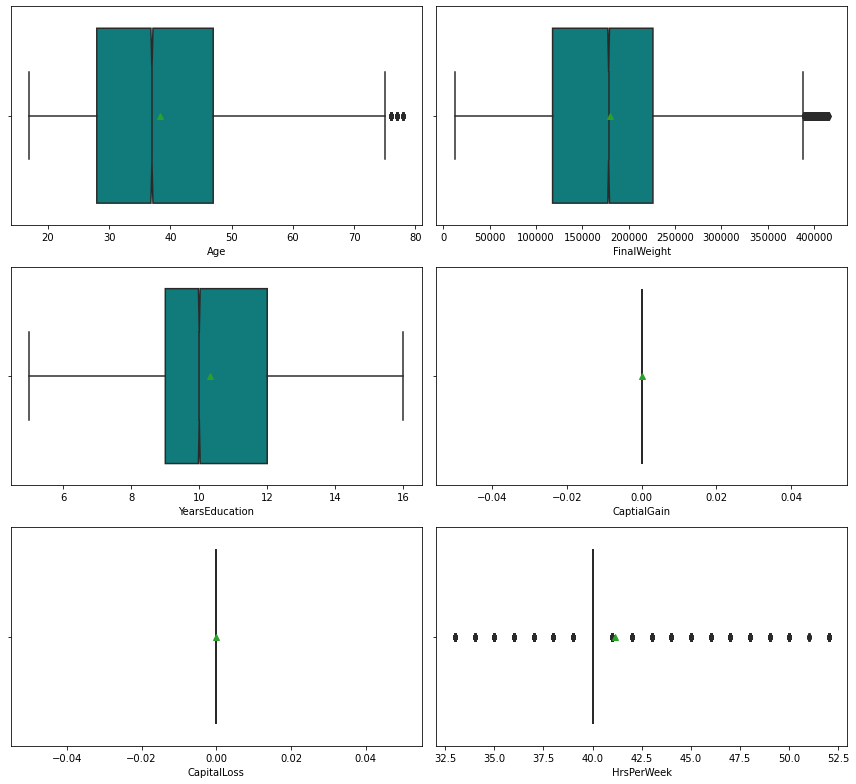

In [14]:
fig=plt.figure()
for i,col in enumerate(num_cols):
    fig.add_subplot(3,2,i+1)
    fig.set_size_inches(12,11)
    sns.boxplot(x=col,data=df,showmeans=True,
                showfliers=True,notch=True,color='darkcyan')
    plt.tight_layout()

## Checking for skewness

In [15]:
df.skew()

Age               0.470101
FinalWeight       0.419166
YearsEducation    0.289566
CaptialGain       0.000000
CapitalLoss       0.000000
HrsPerWeek        1.483592
dtype: float64

## Plotting the Object Columns
## We observe that the target column is Imbalanced.

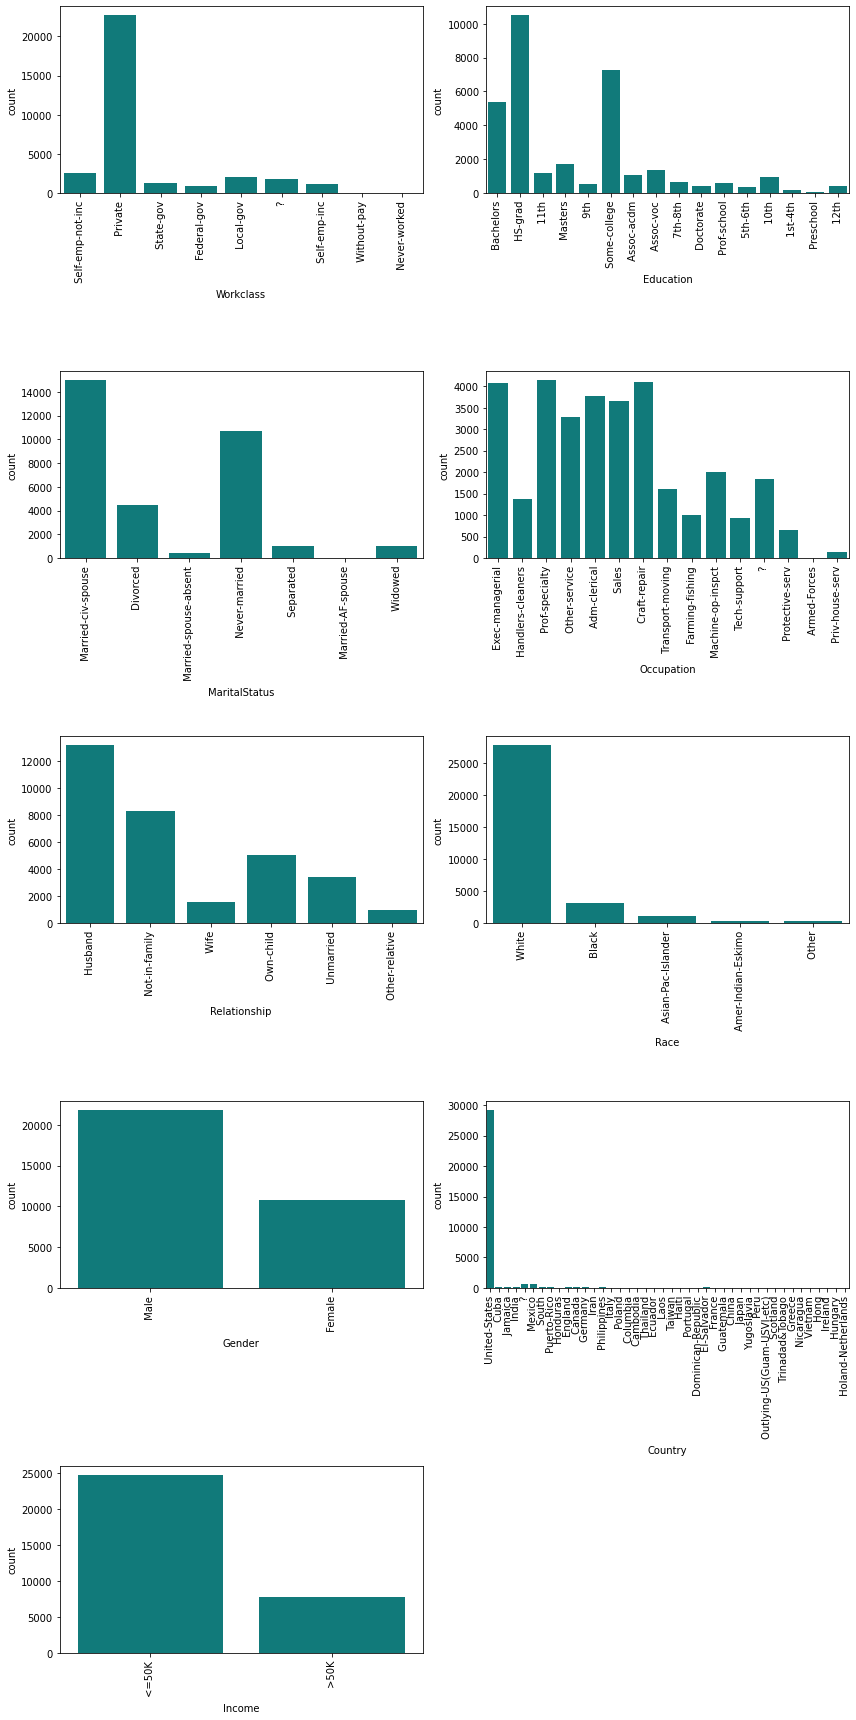

In [16]:
fig=plt.figure()
for i,col in enumerate(object_cols):
    fig.add_subplot(5,2,i+1)
    fig.set_size_inches(12,24)
    sns.countplot(x=col,data=df,color='darkcyan')
    xticks=plt.xticks(rotation=90)
    plt.tight_layout()
    

## Label Encoding

In [17]:
encode=preprocessing.LabelEncoder()
for col in object_cols:
    df[col]=encode.fit_transform(df[col].values)

In [18]:
X=df.drop('Income',axis=1)
y=df.Income

## Scale the Values

In [19]:
std=preprocessing.StandardScaler()
for col in X.columns:
    X[col]=std.fit_transform(X[col].values.reshape(-1,1))

## Splitting Data into train and test sets

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42,stratify=y)

## Define function for training and model inference

In [30]:
def score(model,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test):
    model=model()
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print(metrics.classification_report(y_test,preds))
    print(metrics.confusion_matrix(y_test,preds))
    print("Cohen Kappa Score:",metrics.cohen_kappa_score(y_test,preds))
    print('ROC AUC:',metrics.roc_auc_score(y_test,preds))
    
    above_50k=[]

    ''' Calculating No. of correctly classified people 
    with salary greater than 50K'''

    for true,pred in zip(y_test,preds):
        if true==1 and pred==1:
            above_50k.append(pred)
    print(" No. of people Correctly classified  with salary above 50K:",len(above_50k))


## Comparing Models for best metric.
## Due to imbalanced dataset we can consider ROC-AUC score as a better metric apart from accuracy.

In [31]:
score(ensemble.RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5686
           1       0.68      0.56      0.61      1803

    accuracy                           0.83      7489
   macro avg       0.77      0.74      0.75      7489
weighted avg       0.82      0.83      0.82      7489

[[5212  474]
 [ 798 1005]]
Cohen Kappa Score: 0.5050299226463117
ROC AUC: 0.7370208405149583
 No. of people Correctly classified  with salary above 50K: 1005


In [32]:
score(lightgbm.LGBMClassifier)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5686
           1       0.73      0.58      0.65      1803

    accuracy                           0.85      7489
   macro avg       0.80      0.76      0.77      7489
weighted avg       0.84      0.85      0.84      7489

[[5294  392]
 [ 755 1048]]
Cohen Kappa Score: 0.5501309901280427
ROC AUC: 0.7561561036058049
 No. of people Correctly classified  with salary above 50K: 1048


In [33]:
score(xgboost.XGBClassifier)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      5686
           1       0.70      0.58      0.63      1803

    accuracy                           0.84      7489
   macro avg       0.79      0.75      0.76      7489
weighted avg       0.83      0.84      0.83      7489

[[5239  447]
 [ 766 1037]]
Cohen Kappa Score: 0.5284641261302403
ROC AUC: 0.7482691917894297
 No. of people Correctly classified  with salary above 50K: 1037


In [34]:
score(ensemble.AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5686
           1       0.72      0.54      0.62      1803

    accuracy                           0.84      7489
   macro avg       0.79      0.74      0.76      7489
weighted avg       0.83      0.84      0.83      7489

[[5310  376]
 [ 831  972]]
Cohen Kappa Score: 0.517572362760622
ROC AUC: 0.7364870836096247
 No. of people Correctly classified  with salary above 50K: 972


In [35]:
score(catboost.CatBoostClassifier)

Learning rate set to 0.040774
0:	learn: 0.6563288	total: 36.2ms	remaining: 36.1s
1:	learn: 0.6238955	total: 54.4ms	remaining: 27.2s
2:	learn: 0.5952379	total: 107ms	remaining: 35.5s
3:	learn: 0.5732565	total: 131ms	remaining: 32.6s
4:	learn: 0.5522345	total: 147ms	remaining: 29.3s
5:	learn: 0.5323469	total: 162ms	remaining: 26.8s
6:	learn: 0.5166239	total: 178ms	remaining: 25.2s
7:	learn: 0.5008976	total: 195ms	remaining: 24.2s
8:	learn: 0.4869537	total: 217ms	remaining: 23.9s
9:	learn: 0.4768398	total: 236ms	remaining: 23.3s
10:	learn: 0.4659675	total: 252ms	remaining: 22.6s
11:	learn: 0.4573553	total: 278ms	remaining: 22.9s
12:	learn: 0.4479264	total: 305ms	remaining: 23.2s
13:	learn: 0.4401258	total: 319ms	remaining: 22.5s
14:	learn: 0.4330589	total: 334ms	remaining: 21.9s
15:	learn: 0.4272840	total: 350ms	remaining: 21.5s
16:	learn: 0.4227668	total: 367ms	remaining: 21.2s
17:	learn: 0.4177335	total: 384ms	remaining: 21s
18:	learn: 0.4137987	total: 397ms	remaining: 20.5s
19:	learn: 

## We can observe that LightGBM and CatBoost perform better than other ensemble methods.
## Highest correctly classifed no. of people with salary > 50K can be obtained from catboost classifier which is **1051**.